<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_24/CS166_Session_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib
%matplotlib inline
from pylab import *
import networkx as nx
import random

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random.random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def synchronous_update(p_i, p_r):
    global g
    for a in list(g.nodes):
        if g.nodes[a]['state'] == 0: 
            for b in list(g.neighbors(a)):
                if g.nodes[b]['state'] == 1: 
                    g.nodes[a]['state'] = 1 if random.random() < p_i else 0
        else: 
            g.nodes[a]['state'] = 0 if random.random() < p_r else 1


def asynchronous_update(p_i, p_r):
    global g
    a = random.choice(list(g.nodes))
    if g.nodes[a]['state'] == 0:
        b = random.choice(list(g.neighbors(a)))
        if g.nodes[b]['state'] == 1: 
            g.nodes[a]['state'] = 1 if random.random() < p_i else 0
    else: 
        g.nodes[a]['state'] = 0 if random.random() < p_r else 1


In [3]:
def run_simulation(update_function, n = 500, *args, **kwargs):
    initialize()
    for _ in range(n):
        update_function(*args, **kwargs)
    observe()

Synchronous update


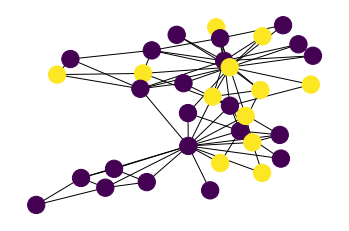

In [4]:
n = 100
p_i = 0.5
p_r = 0.5

print("Synchronous update")
run_simulation(synchronous_update, n = n, p_i = p_i, p_r = p_r)

Asynchronous update


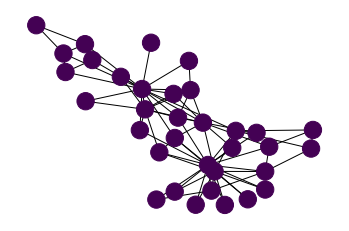

In [5]:
print("Asynchronous update")
run_simulation(asynchronous_update, p_i = p_i, p_r = p_r)

Synchronous update


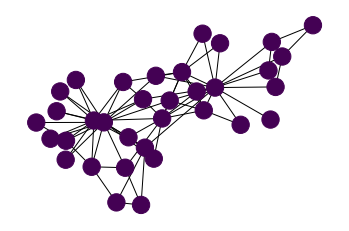

In [6]:
n = 100
p_i = 0.04
p_r = 0.5

print("Synchronous update")
run_simulation(synchronous_update, n = n, p_i = p_i, p_r = p_r)

Asynchronous update


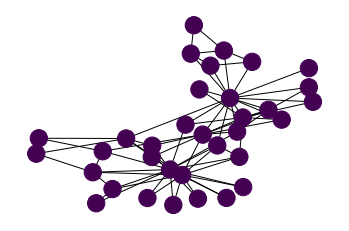

In [7]:
print("Asynchronous update")
run_simulation(asynchronous_update, p_i = p_i, p_r = p_r)

**b. Question: Why does using synchronous or asynchronous updating make a difference?**

In synchronous update, we check every single neighbor and update all the nodes, which guarantees for more accurate results (but at the expense of taking more time) whereas asynchronous update means we are randomizing which nodes we check => might miss some nodes => not as accurate.

**c. Question: For the mean-field approximation described in Section 18.5, why is it appropriate to use the synchronous update method and not the asynchronous one?**


In [11]:
nodes = 1000
edges = 20000
seed = 2022

p = 2*edges/(nodes*(nodes-1))

erdos_renyi = nx.erdos_renyi_graph(nodes, p, seed = seed)
watts_strogatz = nx.connected_watts_strogatz_graph(nodes, int(2*(edges/nodes)), p = 0.2, seed = seed)
barabasi_albert = nx.barabasi_albert_graph(nodes, int(edges/nodes), seed = seed)

def get_average_degree(graph):
    return sum(list(dict(graph.degree()).values()))/nodes


erdos_renyi_deg = get_average_degree(erdos_renyi)
watts_strogatz_deg = get_average_degree(watts_strogatz)
barabasi_albert_deg = get_average_degree(barabasi_albert)


print("Average degree of Erdos-Renyi:" , erdos_renyi_deg)
print("Average degree of Watts-Strogatz:" , watts_strogatz_deg)
print("Average degree of Barabasi-Albert:" , barabasi_albert_deg)

Average degree of Erdos-Renyi: 39.982
Average degree of Watts-Strogatz: 40.0
Average degree of Barabasi-Albert: 39.2


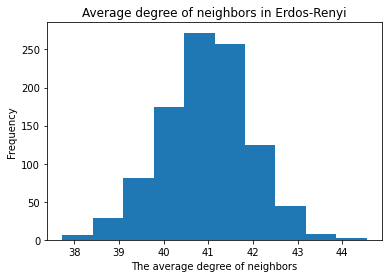

40.969529642455846


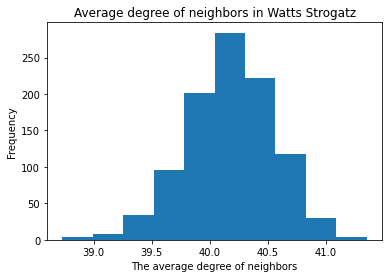

40.179778895402976


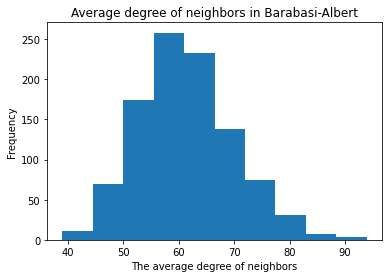

61.340247443531176


In [15]:
import numpy as np

def neighbors_degrees(g, name):
    avg_degrees = []
    for node in list(g.nodes):
        neighbor_degrees = []
        for neighbor in list(g.neighbors(node)):
            neighbor_degrees.append(g.degree(neighbor))
            
        avg_degrees.append(np.mean(neighbor_degrees))
            
    plt.hist(avg_degrees)
    plt.title(f"Average degree of neighbors in {name}")
    plt.xlabel("The average degree of neighbors")
    plt.ylabel("Frequency")
    plt.show()

    return np.mean(avg_degrees)

print(neighbors_degrees(erdos_renyi, "Erdos-Renyi"))
print(neighbors_degrees(watts_strogatz, "Watts Strogatz"))
print(neighbors_degrees(barabasi_albert, "Barabasi-Albert"))

Question: How does the average degree of neighbors (the number of friends of
your friends) compare to the average degree of the graph (your number of friends)?

For both the Erdos-Renyi and the Watts-Strogatz graph, the average degree is roughly the same (~40 connections). However, the average degree of the graph for Barabasi-Albert is 60, meaning our neighbors are indeed more popular than us.